In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv('mushroom.csv')
print("First 5 rows of dataset:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nClass Distribution:\n", df['class'].value_counts())

First 5 rows of dataset:
    Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print

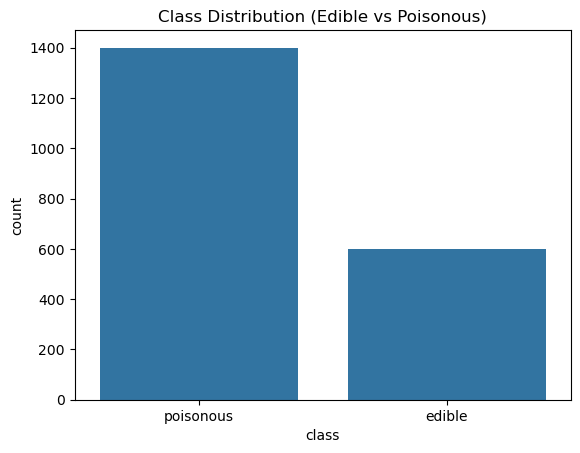

In [3]:
# ============================
# Task 1: Exploratory Data Analysis (EDA)
# ============================

# Class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

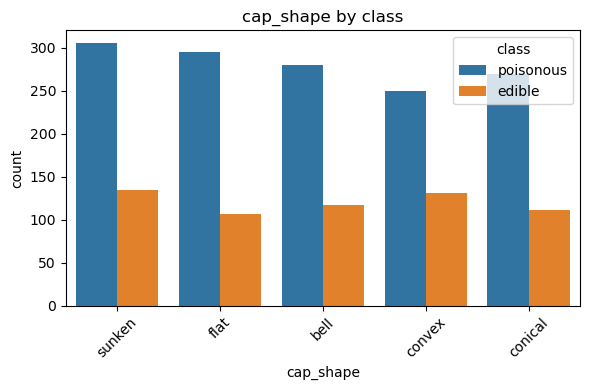

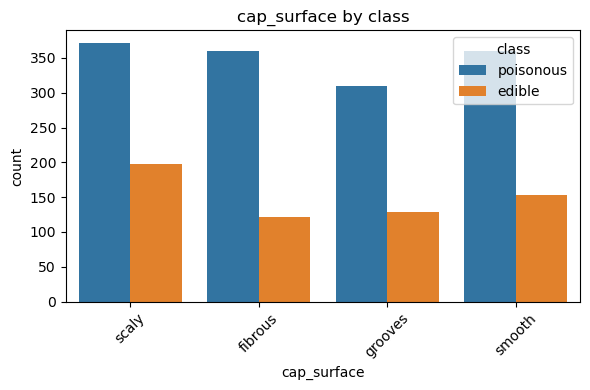

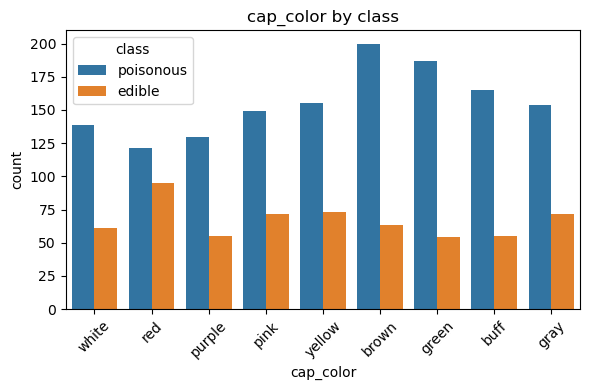

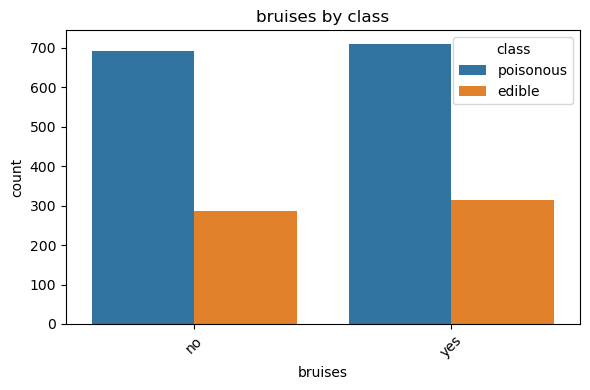

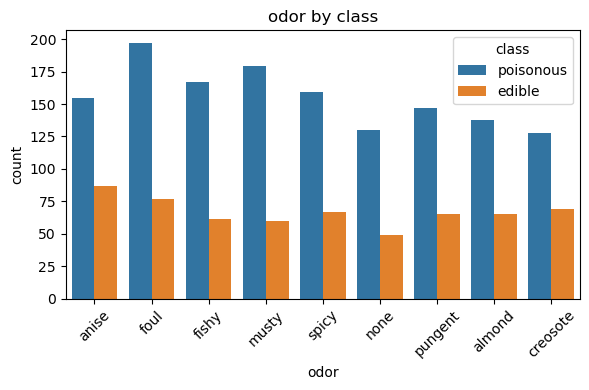

In [4]:
# Feature frequency plot for a few features
for col in df.columns[1:6]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f"{col} by class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
# ============================
# Task 2: Data Preprocessing
# ============================

# Encoding categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [6]:
# Split features and target
X = df.drop('class', axis=1)
y = df['class']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

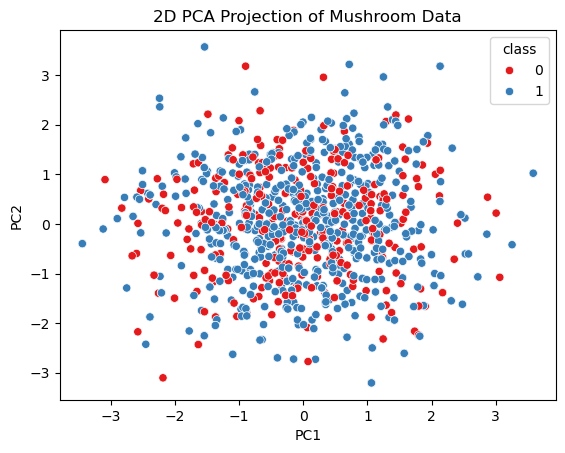

In [9]:
# ============================
# Task 3: Data Visualization (Pair plot)
# ============================
# Using PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)
df_vis = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_vis['class'] = y_train.values

sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='class', palette='Set1')
plt.title("2D PCA Projection of Mushroom Data")
plt.show()

In [10]:
# ============================
# Task 4: SVM Implementation
# ============================

# SVM with default (RBF) kernel
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
print("\nSVM (RBF kernel) Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


SVM (RBF kernel) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.54       133
           1       0.76      0.99      0.86       267

    accuracy                           0.79       400
   macro avg       0.86      0.68      0.70       400
weighted avg       0.83      0.79      0.75       400

Confusion Matrix:
 [[ 50  83]
 [  2 265]]


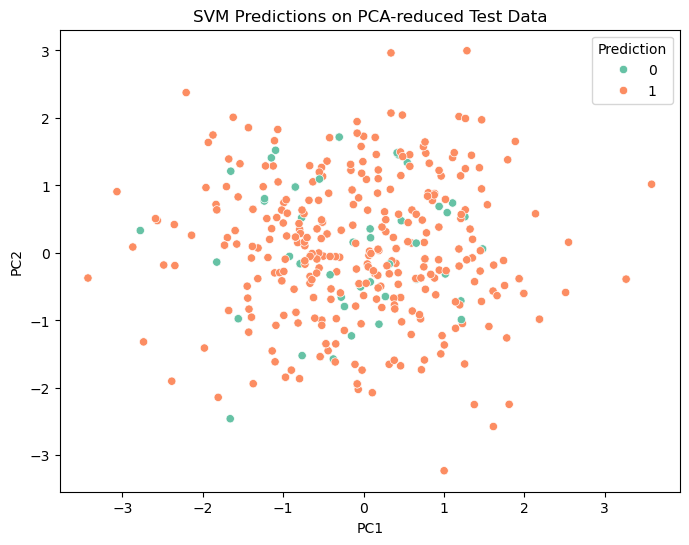

In [11]:
# ============================
# Task 5: SVM Result Visualization
# ============================

# Project test data to 2D using PCA
X_test_pca = pca.transform(X_test_scaled)
df_pred_vis = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
df_pred_vis['Prediction'] = y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pred_vis, x='PC1', y='PC2', hue='Prediction', palette='Set2')
plt.title("SVM Predictions on PCA-reduced Test Data")
plt.show()

In [12]:
# ============================
# Task 6: Hyperparameter Tuning
# ============================

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=0)
grid.fit(X_train_scaled, y_train)

print("\nBest Parameters from Grid Search:")
print(grid.best_params_)


Best Parameters from Grid Search:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [13]:
# Evaluate best model
best_svm = grid.best_estimator_
y_best_pred = best_svm.predict(X_test_scaled)

print("\nBest SVM Model Performance:")
print(classification_report(y_test, y_best_pred))


Best SVM Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       133
           1       0.88      0.92      0.90       267

    accuracy                           0.86       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.86      0.86      0.86       400



In [14]:
# ============================
# Task 7: Kernel Comparison
# ============================

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel, C=1)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    print(f"\nSVM with {kernel} kernel - Accuracy: {acc:.4f}")


SVM with linear kernel - Accuracy: 0.6675

SVM with poly kernel - Accuracy: 0.8300

SVM with rbf kernel - Accuracy: 0.7875
